In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa

# SET SEED
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar100.load_data()

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [ ]:
def plot_result(history):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    axes[0].set_title('Loss and Accuracy')
    axes[0].plot(history.history['loss'], '-g', label='Train losses')
    axes[0].plot(history.history['val_loss'], ':r', label='Valid losses')
    axes[0].legend()
    axes[1].plot(history.history['accuracy'], '-b', label='Train accuracy')
    axes[1].plot(history.history['val_accuracy'], ':k', label='Valid accuracy')
    axes[1].legend()

In [ ]:
def augmentor(images):
    'Apply data augmentation'
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.Crop(percent=(0, 0.1)),
        iaa.Sometimes(
            0.5,
            iaa.GaussianBlur(sigma=(0, 0.5))
        ),
        iaa.LinearContrast((0.75, 1.5)),
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        iaa.Multiply((0.8, 1.2), per_channel=0.2)
    ])

    return seq(images=images)

def augment_dataset(X, Y):
    split = round(X.shape[0]*0.8)
    X_train = X[:split]
    Y_train = Y[:split]
    X_val = X[split:]
    Y_val = Y[split:]
    return (augmentor(X_train*255)/255, Y_train), (X_val, Y_val)

(X_train_augment, Y_train_augment), (X_val, Y_val) = augment_dataset(X_train, Y_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


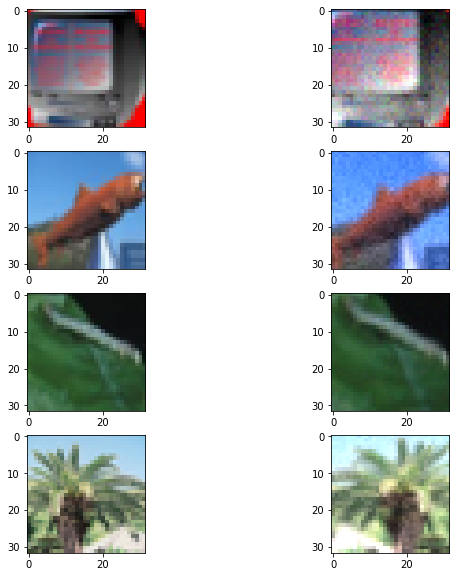

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
indexes = np.random.randint(X_train_augment.shape[0], size=(4,))
for i in range(4):
    axes[i][0].imshow(X_train[indexes[i]])
    axes[i][1].imshow(X_train_augment[indexes[i]])

In [ ]:
INPUT_SHAPE = (32, 32, 3)
N_CLASSES = 100
BATCH_SIZE = 256
N_EPOCHS = 30

In [ ]:
from keras import Input, Model
from keras.layers import Conv2D, BatchNormalization, Activation, Flatten, Dense, MaxPooling2D, Add
from keras.losses import CategoricalCrossentropy
from keras import regularizers

# Batch normalization

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model1 = keras.Model(inputs=[input_tensor], outputs=[x])
model1.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0     

In [ ]:
history1 = model1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)
model1.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 29s 131ms/step - loss: 3.8182 - accuracy: 0.1330 - val_loss: 5.7862 - val_accuracy: 0.0215
Epoch 2/30
157/157 [==============================] - 20s 129ms/step - loss: 2.5858 - accuracy: 0.3383 - val_loss: 3.3417 - val_accuracy: 0.2468
Epoch 3/30
157/157 [==============================] - 21s 132ms/step - loss: 1.9918 - accuracy: 0.4718 - val_loss: 2.7930 - val_accuracy: 0.3316
Epoch 4/30
157/157 [==============================] - 21s 137ms/step - loss: 1.5426 - accuracy: 0.5834 - val_loss: 2.7017 - val_accuracy: 0.3599
Epoch 5/30
157/157 [==============================] - 22s 141ms/step - loss: 1.1634 - accuracy: 0.6812 - val_loss: 2.3669 - val_accuracy: 0.4209
Epoch 6/30
157/157 [==============================] - 21s 136ms/step - loss: 0.8211 - accuracy: 0.7751 - val_loss: 2.8405 - val_accuracy: 0.3733
Epoch 7/30
157/157 [==============================] - 21s 134ms/step - loss: 0.4850 - accuracy: 0.8779 - val_loss: 2.3793 - val_ac

[2.112703323364258, 0.5648000240325928]

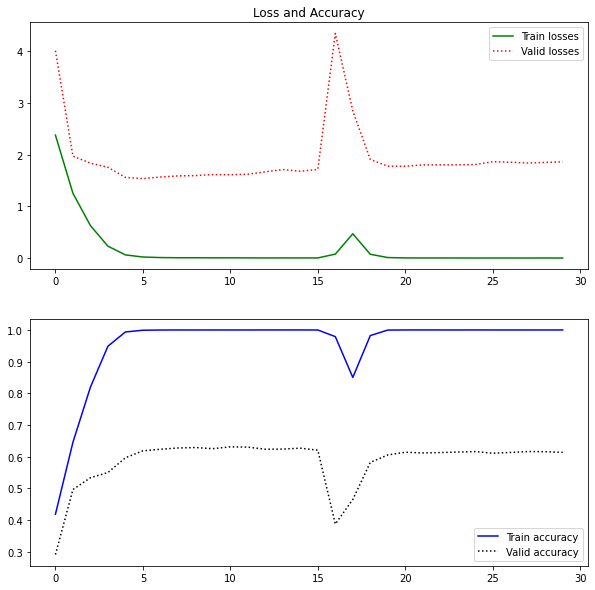

In [ ]:
plot_result(history1)

# Data augmentation

In [ ]:
input_tensor = Input(INPUT_SHAPE)

x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model2 = keras.Model(inputs=[input_tensor], outputs=[x])
model2.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0   

In [ ]:
history2 = model2.fit(X_train_augment, Y_train_augment, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_data=(X_val, Y_val))
model2.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 21s 127ms/step - loss: 4.1656 - accuracy: 0.0784 - val_loss: 4.8007 - val_accuracy: 0.0722
Epoch 2/30
157/157 [==============================] - 20s 129ms/step - loss: 3.1091 - accuracy: 0.2391 - val_loss: 3.5647 - val_accuracy: 0.2047
Epoch 3/30
157/157 [==============================] - 20s 130ms/step - loss: 2.5242 - accuracy: 0.3589 - val_loss: 3.2042 - val_accuracy: 0.2743
Epoch 4/30
157/157 [==============================] - 21s 131ms/step - loss: 2.0594 - accuracy: 0.4569 - val_loss: 2.6573 - val_accuracy: 0.3504
Epoch 5/30
157/157 [==============================] - 21s 132ms/step - loss: 1.6403 - accuracy: 0.5623 - val_loss: 2.5580 - val_accuracy: 0.3747
Epoch 6/30
157/157 [==============================] - 21s 133ms/step - loss: 1.2894 - accuracy: 0.6518 - val_loss: 2.9176 - val_accuracy: 0.3571
Epoch 7/30
157/157 [==============================] - 21s 134ms/step - loss: 0.8997 - accuracy: 0.7657 - val_loss: 2.8596 - val_ac

[2.593552827835083, 0.5049999952316284]

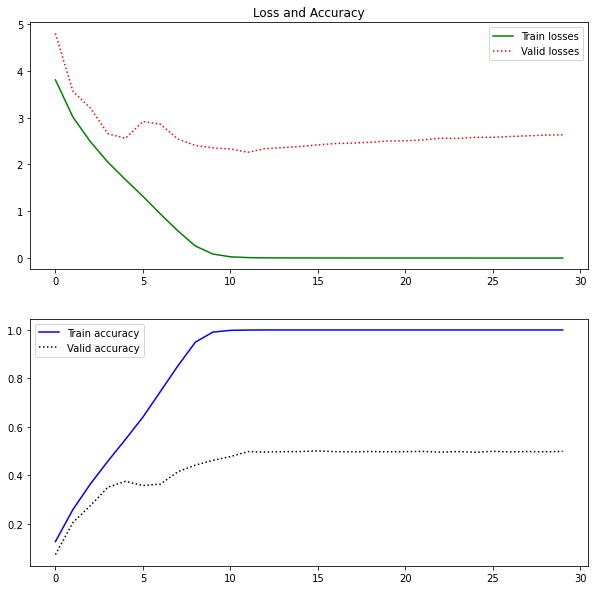

In [ ]:
plot_result(history2)

# Kernel regularizer

In [ ]:
input_tensor = Input(INPUT_SHAPE)

weight_decay = 1e-5

x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(256, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Conv2D(512, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(512, 3, padding='same', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(weight_decay, weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(N_CLASSES, activation='softmax')(x)

model3 = keras.Model(inputs=[input_tensor], outputs=[x])
model3.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0   

In [ ]:
history3 = model3.fit(X_train_augment, Y_train_augment, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_data=(X_val, Y_val))
model3.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=0)

Epoch 1/30
157/157 [==============================] - 25s 150ms/step - loss: 5.9225 - accuracy: 0.0762 - val_loss: 6.6365 - val_accuracy: 0.0305
Epoch 2/30
157/157 [==============================] - 22s 142ms/step - loss: 4.5618 - accuracy: 0.2376 - val_loss: 5.0885 - val_accuracy: 0.1679
Epoch 3/30
157/157 [==============================] - 22s 138ms/step - loss: 3.7569 - accuracy: 0.3508 - val_loss: 4.2243 - val_accuracy: 0.2728
Epoch 4/30
157/157 [==============================] - 22s 140ms/step - loss: 3.2934 - accuracy: 0.4343 - val_loss: 3.9495 - val_accuracy: 0.3210
Epoch 5/30
157/157 [==============================] - 22s 142ms/step - loss: 2.9702 - accuracy: 0.5032 - val_loss: 4.0885 - val_accuracy: 0.3121
Epoch 6/30
157/157 [==============================] - 22s 142ms/step - loss: 2.7767 - accuracy: 0.5599 - val_loss: 4.1893 - val_accuracy: 0.3130
Epoch 7/30
157/157 [==============================] - 22s 140ms/step - loss: 2.5360 - accuracy: 0.6345 - val_loss: 4.1545 - val_ac

[3.3288512229919434, 0.47540000081062317]

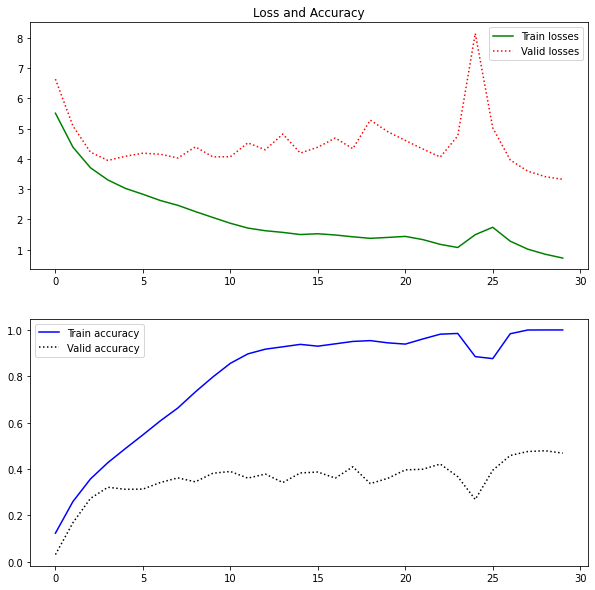

In [ ]:
plot_result(history3)